In [1]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import cv2
from skimage import color,io
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

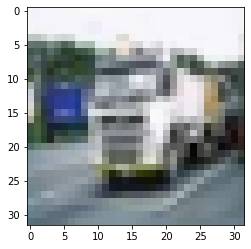

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[1000])

In [4]:
def togray(image):    
    im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    im = np.reshape(im, (im.shape[0], im.shape[1], 1))
    return im

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
def CNN_model():
    
    # Input layer
    input_shape = (32,32,3)

    model = keras.Sequential([

        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=input_shape),
        keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"),
        keras.layers.BatchNormalization(),

        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=input_shape),
        keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"),
        keras.layers.BatchNormalization(),

        keras.layers.Conv2D(filters=32, kernel_size=(2,2), activation="relu", input_shape=input_shape),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="same"),
        keras.layers.BatchNormalization(),

        keras.layers.Flatten(),
        keras.layers.Dense(128,activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout((0.2)),
        keras.layers.Dense(128,activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout((0.2)),
        keras.layers.Dense(10, activation="softmax")
    ])

    print(model.summary())
    return model

In [7]:
model = CNN_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                        

In [8]:
callbacks = EarlyStopping(monitor="val_loss", patience=5, verbose=1, mode="auto")
best_model_file = "CIFAR.h5"
best_model = ModelCheckpoint(best_model_file, monitor="val_accuracy", verbose=1, save_best_only=True)

In [9]:
def train(model, X_train, y_train):    
        
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    model.fit(X_train,y_train, validation_split=0.2, epochs=100, verbose=1, batch_size=128, callbacks=[best_model])
    
    return model    

In [ ]:
modelsaved = train(model, x_train, y_train)

Epoch 1/100
313/313 [==============================] - ETA: 0s - loss: 2.4083 - accuracy: 0.2185
Epoch 1: val_accuracy improved from -inf to 0.19990, saving model to CIFAR.h5
313/313 [==============================] - 14s 27ms/step - loss: 2.4083 - accuracy: 0.2185 - val_loss: 2.2914 - val_accuracy: 0.1999
Epoch 2/100
312/313 [============================>.] - ETA: 0s - loss: 1.9138 - accuracy: 0.3369
Epoch 2: val_accuracy improved from 0.19990 to 0.38620, saving model to CIFAR.h5
313/313 [==============================] - 7s 24ms/step - loss: 1.9136 - accuracy: 0.3370 - val_loss: 1.7130 - val_accuracy: 0.3862
Epoch 3/100
312/313 [============================>.] - ETA: 0s - loss: 1.7194 - accuracy: 0.3933
Epoch 3: val_accuracy improved from 0.38620 to 0.46240, saving model to CIFAR.h5
313/313 [==============================] - 7s 22ms/step - loss: 1.7190 - accuracy: 0.3934 - val_loss: 1.4979 - val_accuracy: 0.4624
Epoch 4/100
311/313 [============================>.] - ETA: 0s - loss: 1

Epoch 28/100
313/313 [==============================] - ETA: 0s - loss: 0.8740 - accuracy: 0.6949
Epoch 28: val_accuracy improved from 0.67250 to 0.67910, saving model to CIFAR.h5
313/313 [==============================] - 9s 30ms/step - loss: 0.8740 - accuracy: 0.6949 - val_loss: 0.9124 - val_accuracy: 0.6791
Epoch 29/100
312/313 [============================>.] - ETA: 0s - loss: 0.8586 - accuracy: 0.6984
Epoch 29: val_accuracy did not improve from 0.67910
313/313 [==============================] - 7s 23ms/step - loss: 0.8585 - accuracy: 0.6985 - val_loss: 0.9308 - val_accuracy: 0.6752
Epoch 30/100
312/313 [============================>.] - ETA: 0s - loss: 0.8472 - accuracy: 0.7018
Epoch 30: val_accuracy improved from 0.67910 to 0.68730, saving model to CIFAR.h5
313/313 [==============================] - 8s 24ms/step - loss: 0.8474 - accuracy: 0.7017 - val_loss: 0.8977 - val_accuracy: 0.6873
Epoch 31/100
312/313 [============================>.] - ETA: 0s - loss: 0.8384 - accuracy: 0.7

313/313 [==============================] - ETA: 0s - loss: 0.5478 - accuracy: 0.8066
Epoch 84: val_accuracy did not improve from 0.71710
313/313 [==============================] - 7s 21ms/step - loss: 0.5478 - accuracy: 0.8066 - val_loss: 0.8556 - val_accuracy: 0.7166
Epoch 85/100
312/313 [============================>.] - ETA: 0s - loss: 0.5426 - accuracy: 0.8092
Epoch 85: val_accuracy did not improve from 0.71710
313/313 [==============================] - 7s 22ms/step - loss: 0.5429 - accuracy: 0.8091 - val_loss: 0.8770 - val_accuracy: 0.7101
Epoch 86/100
311/313 [============================>.] - ETA: 0s - loss: 0.5422 - accuracy: 0.8094
Epoch 86: val_accuracy did not improve from 0.71710
313/313 [==============================] - 7s 21ms/step - loss: 0.5423 - accuracy: 0.8094 - val_loss: 0.8709 - val_accuracy: 0.7086
Epoch 87/100
311/313 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.8104
Epoch 87: val_accuracy did not improve from 0.71710
313/313 [========

In [ ]:
_, accuracy = modelsaved.evaluate(x_test, y_test)

print("Accuracy: %.2f" % (accuracy*100))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = modelsaved.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)


print(classification_report(y_test, y_pred))

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred , normalize='pred')
plt.figure(figsize=(15,9))
sns.heatmap(cm, annot=True)